## Parse Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def list_to_plate(lst: pd.Series) -> pd.DataFrame:
    new_index = pd.MultiIndex.from_tuples([(i[0], int(i[1:])) for i in lst.index])
    plate =  pd.Series(lst.values, index=new_index).unstack()
    return plate

def plate_to_list(plate: pd.DataFrame) -> pd.Series:
    s = plate.stack()
    s.index = [f'{row}{col}' for row, col in s.index]
    return s

def set_plate_axes(df: pd.DataFrame) -> pd.DataFrame:
    """ Given a dataframe representing a multiwell plate, set axes to be proper plate axes. """

    df.columns = range(1, len(df.columns)+1)
    df.index = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P'][:len(df.index)]
    return df

def bars(df, **kwargs):
    ax = sns.barplot(data=df,alpha=0.8, **kwargs)
    ax = sns.stripplot(data=df, ax=ax, size=6, dodge=True, legend=False,  edgecolor='black', linewidth=1, **kwargs)
    if 'hue' in kwargs.keys():
      plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    return ax


In [2]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

from pathlib import Path
DRIVE_FOLDER = Path('/content/drive/Shared drives/Student Biolab Zurich/iDEC/iDEC 2024/Lab results/Phage Propagation Assays/20240921_pVan_validation 2054-08-DP6')

!ls "{DRIVE_FOLDER}"

cts1 = pd.read_csv(DRIVE_FOLDER / '20240922_iDEC_VanPhageProp_Timepoint_1.txt', sep='\t', header=1)[['Pos', 'Cp']]
cts1 = list_to_plate(cts1.set_index('Pos').Cp)
cts2 = pd.read_csv(DRIVE_FOLDER / '20240922_iDEC_VanPhageProp_Timepoint_2.txt', sep='\t', header=1)[['Pos', 'Cp']]
cts2 = list_to_plate(cts2.set_index('Pos').Cp)

layout_plate1 = pd.read_excel(DRIVE_FOLDER / 'Layout_plate_21.09.xlsx', header=None)




Mounted at /content/drive
20240921_analysis.ipynb			    20240922_iDEC_VanPhageProp_Timepoint_2.txt
20240922_iDEC_VanPhageProp_Timepoint_1.txt  Layout_plate_21.09.xlsx


In [3]:
cts_plate1 = plate_to_list(set_plate_axes(cts1.iloc[::2, :12])).reset_index().rename(columns={0: 'cp', 'index': 'well'})
cts_plate1['tp_min'] = 30
cts_plate2 = plate_to_list(set_plate_axes(cts1.iloc[1::2, :12])).reset_index().rename(columns={0: 'cp', 'index': 'well'})
cts_plate2['tp_min'] = 60
cts_plate3 = plate_to_list(set_plate_axes(cts1.iloc[::2, 12:])).reset_index().rename(columns={0: 'cp', 'index': 'well'})
cts_plate3['tp_min'] = 120
cts_plate4 = plate_to_list(set_plate_axes(cts1.iloc[1::2, 12:])).reset_index().rename(columns={0: 'cp', 'index': 'well'})
cts_plate4['tp_min'] = 240

cts_plate5 = plate_to_list(set_plate_axes(cts2.iloc[::2, :12])).reset_index().rename(columns={0: 'cp', 'index': 'well'})
cts_plate5['tp_min'] = 480


cts_all = pd.concat([cts_plate1, cts_plate2, cts_plate3, cts_plate4, cts_plate5])
cts_all

,well,cp,tp_min
0,A1,22.09,30
1,A2,24.02,30
2,A3,23.65,30
3,A4,22.94,30
4,A5,22.72,30
...,...,...,...
64,G11,26.46,480
65,G12,26.97,480
66,H3,7.49,480
67,H4,6.80,480


In [32]:
list_to_plate(cts_plate4.set_index('well').cp)

,1,2,3,4,5,6,7,8,9,10,11,12
A,18.79,18.92,19.00,19.31,19.16,20.62,20.83,19.27,20.15,22.46,22.98,21.78
B,15.20,14.85,13.67,14.02,NaN,14.32,15.58,NaN,14.22,17.14,18.56,17.05
C,21.89,21.51,21.13,14.49,14.01,NaN,23.68,23.52,23.36,28.68,28.77,28.90
D,8.77,8.21,8.25,NaN,8.80,NaN,8.53,NaN,NaN,8.09,8.68,8.50
E,23.99,26.85,25.03,22.90,25.09,25.55,26.87,26.73,22.89,26.24,26.78,25.81
F,19.52,21.92,21.18,17.94,21.85,20.97,23.45,23.29,19.22,21.71,21.94,22.59
G,23.57,25.94,25.27,16.55,18.21,19.71,26.50,26.15,26.57,28.02,29.05,29.02
H,11.19,10.80,10.81,NaN,10.55,NaN,10.59,10.57,10.63,10.68,10.77,10.21


In [5]:
list_to_plate(cts_plate4.set_index('well').cp)

,1,2,3,4,5,6,7,8,9,10,11,12
A,18.79,18.92,19.00,19.31,19.16,20.62,20.83,19.27,20.15,22.46,22.98,21.78
B,15.20,14.85,13.67,14.02,NaN,14.32,15.58,NaN,14.22,17.14,18.56,17.05
C,21.89,21.51,21.13,14.49,14.01,NaN,23.68,23.52,23.36,28.68,28.77,28.90
D,8.77,8.21,8.25,NaN,8.80,NaN,8.53,NaN,NaN,8.09,8.68,8.50
E,23.99,26.85,25.03,22.90,25.09,25.55,26.87,26.73,22.89,26.24,26.78,25.81
F,19.52,21.92,21.18,17.94,21.85,20.97,23.45,23.29,19.22,21.71,21.94,22.59
G,23.57,25.94,25.27,16.55,18.21,19.71,26.50,26.15,26.57,28.02,29.05,29.02
H,11.19,10.80,10.81,NaN,10.55,NaN,10.59,10.57,10.63,10.68,10.77,10.21


In [6]:
def parse_plate(df, num_cols):
  pass

def parse_layout(layout: pd.DataFrame):
  idx = 0
  plates = []
  while idx < len(layout.index)-9:
    if layout.iloc[idx, 0] is not None:
      plate = set_plate_axes(layout.iloc[idx+2:idx+2+8, 1:1+12])
      print(plate)
      plate = plate_to_list(plate)
      plate.name = layout.iloc[idx,  0]
      plates.append(plate)
      idx += 11
    else:
      idx += 1
  return pd.concat(plates, axis=1)

meta_plate1 = parse_layout(layout_plate1).reset_index().rename(columns={'index': 'well'})
meta = meta_plate1


            1            2            3            4            5   \
A  2054-08-DP6  2054-08-DP6  2054-08-DP6  2054-08-DP6  2054-08-DP6   
B    S2060-DP6    S2060-DP6    S2060-DP6    S2060-DP6    S2060-DP6   
C  2054-08-DP6  2054-08-DP6  2054-08-DP6    S2060-DP6    S2060-DP6   
D        S2208        S2208        S2208        S2208        S2208   
E  2054-08-DP6  2054-08-DP6  2054-08-DP6  2054-08-DP6  2054-08-DP6   
F    S2060-DP6    S2060-DP6    S2060-DP6    S2060-DP6    S2060-DP6   
G  2054-08-DP6  2054-08-DP6  2054-08-DP6    S2060-DP6    S2060-DP6   
H        S2208        S2208        S2208        S2208        S2208   

            6            7            8            9            10  \
A  2054-08-DP6  2054-08-DP6  2054-08-DP6  2054-08-DP6  2054-08-DP6   
B    S2060-DP6    S2060-DP6    S2060-DP6    S2060-DP6    S2060-DP6   
C    S2060-DP6           LB           LB           LB           LB   
D        S2208        S2208        S2208        S2208        S2208   
E  2054-08-DP6  205

In [7]:
df = pd.merge(cts_all, meta, on=['well'])
df

,well,cp,tp_min,strain,Phage,van_acid_um,Tetracyclin,Time (min)
0,A1,22.09,30,2054-08-DP6,SIAH1,0,uninduced,30
1,A1,22.07,60,2054-08-DP6,SIAH1,0,uninduced,30
2,A1,21.14,120,2054-08-DP6,SIAH1,0,uninduced,30
3,A1,18.79,240,2054-08-DP6,SIAH1,0,uninduced,30
4,A1,18.86,480,2054-08-DP6,SIAH1,0,uninduced,30
...,...,...,...,...,...,...,...,...
435,H12,25.21,30,S2208,TadA,500,uninduced,30
436,H12,19.99,60,S2208,TadA,500,uninduced,30
437,H12,16.67,120,S2208,TadA,500,uninduced,30
438,H12,10.21,240,S2208,TadA,500,uninduced,30


In [8]:
df.strain.unique()

array(['2054-08-DP6', 'S2060-DP6', 'LB', 'S2208'], dtype=object)

## Time Series

Text(0.5, 1.0, 'LB')

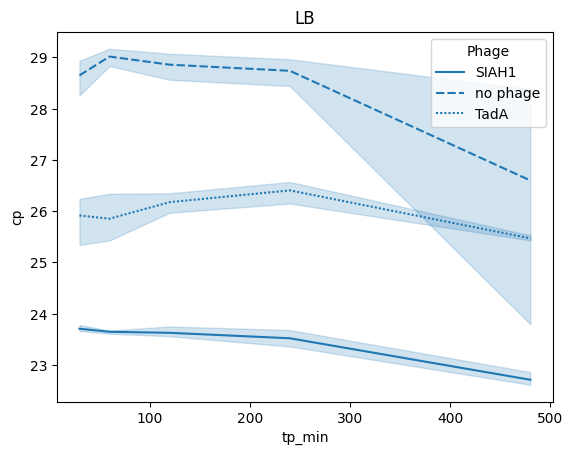

In [9]:
ax = sns.lineplot(df[(df.strain == 'LB')], x='tp_min', y='cp', style='Phage')
ax.set_title('LB')

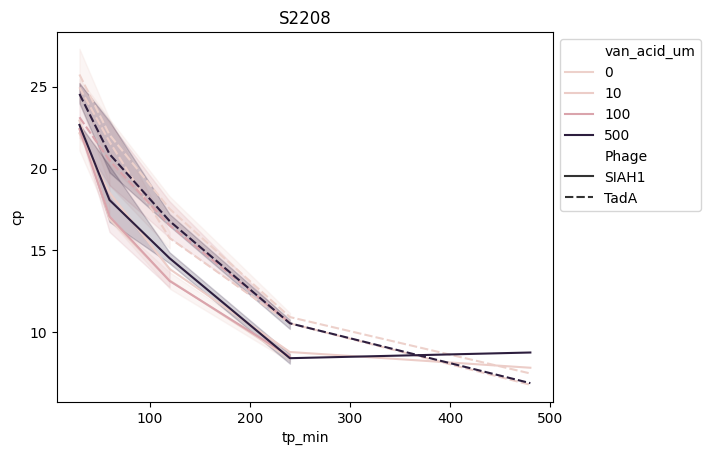

In [10]:
ax = sns.lineplot(df[(df.strain == 'S2208')], x='tp_min', y='cp', hue='van_acid_um', style='Phage')
ax.set_title('S2208')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

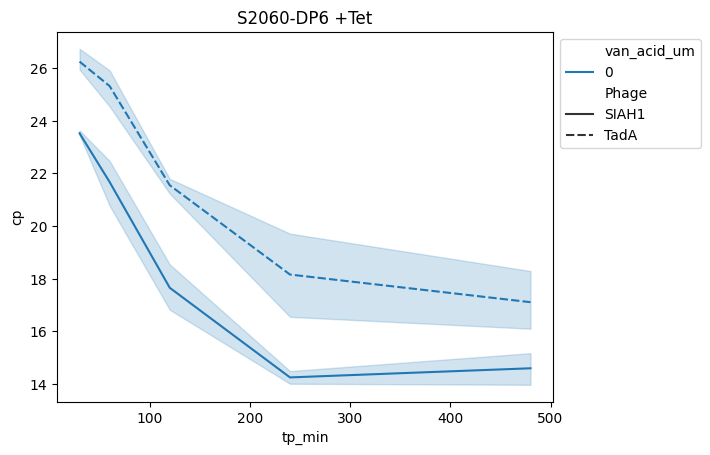

In [11]:
ax = sns.lineplot(df[(df.strain == 'S2060-DP6') & (df.Tetracyclin == 'induced')], x='tp_min', y='cp', hue='van_acid_um', style='Phage')
ax.set_title('S2060-DP6 +Tet')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

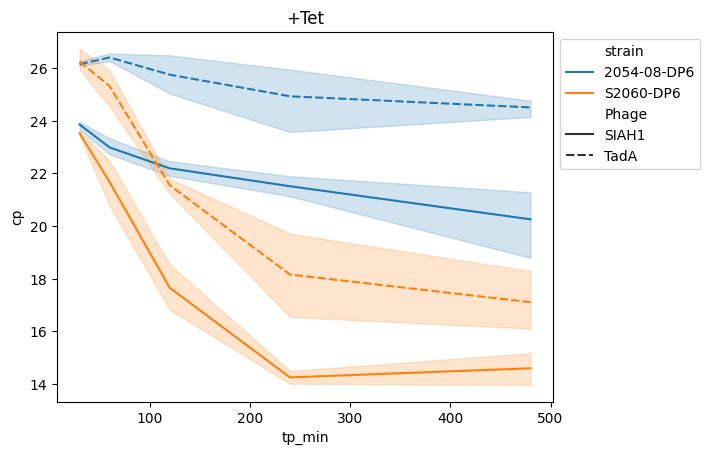

In [12]:
ax = sns.lineplot(df[(df.Tetracyclin == 'induced')], x='tp_min', y='cp', hue='strain', style='Phage')
ax.set_title('+Tet')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

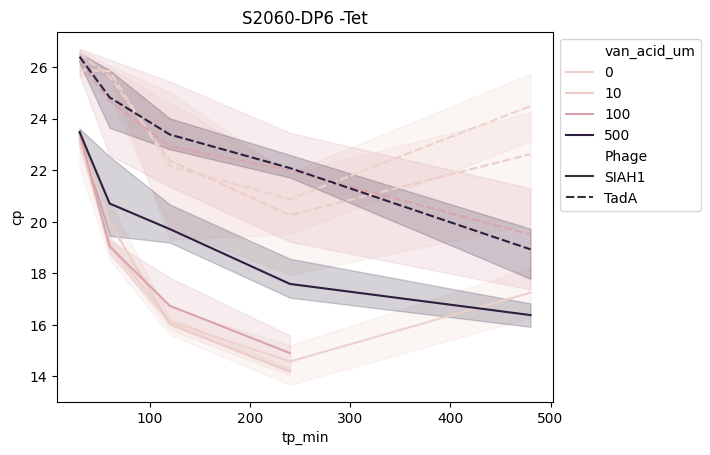

In [13]:
ax = sns.lineplot(df[(df.strain == 'S2060-DP6') & (df.Tetracyclin == 'uninduced')], x='tp_min', y='cp', hue='van_acid_um', style='Phage')
ax.set_title('S2060-DP6 -Tet')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

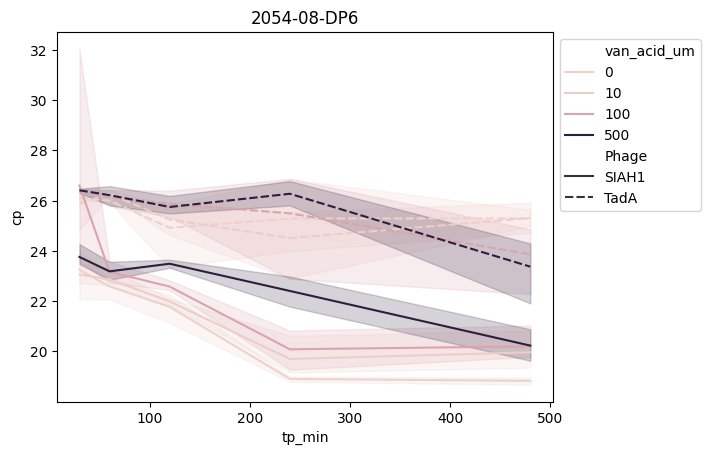

In [14]:
ax = sns.lineplot(df[(df.strain == '2054-08-DP6') & (df.Tetracyclin == 'uninduced')], x='tp_min', y='cp', hue='van_acid_um', style='Phage')
ax.set_title('2054-08-DP6')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))


## Fold change

In [15]:
d_240 = df[(df.tp_min == 240) & (df.Phage != 'SIAH2')]

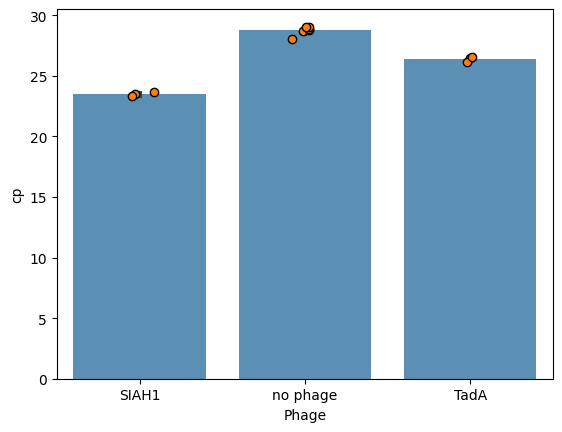

In [16]:
_ = bars(d_240[d_240.strain == 'LB'], x='Phage', y='cp')

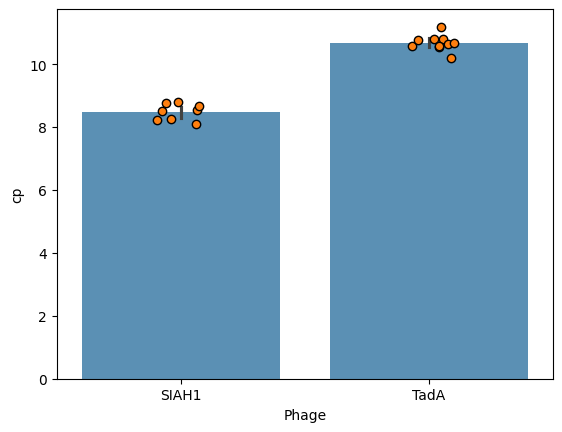

In [17]:
_ = bars(d_240[d_240.strain == 'S2208'], x='Phage', y='cp')

In [18]:
d_240['cp_init'] = pd.NA
for phage in d_240.Phage.unique():
  d_240.loc[d_240.Phage == phage, 'cp_init'] = d_240[(d_240.Phage == phage) & (d_240.strain == 'LB')].cp.mean()

d_240['fc_log2'] = d_240.cp_init - d_240.cp
d_240['fc'] = 2 ** d_240.fc_log2
d_240

<ipython-input-18-cf7697b00353>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_240['cp_init'] = pd.NA
<ipython-input-18-cf7697b00353>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_240['fc_log2'] = d_240.cp_init - d_240.cp
<ipython-input-18-cf7697b00353>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

,well,cp,tp_min,strain,Phage,van_acid_um,Tetracyclin,Time (min),cp_init,fc_log2,fc
3,A1,18.79,240,2054-08-DP6,SIAH1,0,uninduced,30,23.52,4.73,26.538225
8,A2,18.92,240,2054-08-DP6,SIAH1,0,uninduced,30,23.52,4.6,24.251465
13,A3,19.00,240,2054-08-DP6,SIAH1,0,uninduced,30,23.52,4.52,22.943284
18,A4,19.31,240,2054-08-DP6,SIAH1,10,uninduced,30,23.52,4.21,18.507011
23,A5,19.16,240,2054-08-DP6,SIAH1,10,uninduced,30,23.52,4.36,20.534814
...,...,...,...,...,...,...,...,...,...,...,...
422,H8,10.57,240,S2208,TadA,100,uninduced,30,26.406667,15.836667,58520.994517
426,H9,10.63,240,S2208,TadA,100,uninduced,30,26.406667,15.776667,56137.090267
430,H10,10.68,240,S2208,TadA,500,uninduced,30,26.406667,15.726667,54224.854889
434,H11,10.77,240,S2208,TadA,500,uninduced,30,26.406667,15.636667,50945.484741


Text(0.5, 1.0, '2024.09.21 +Tet -van T=4h')

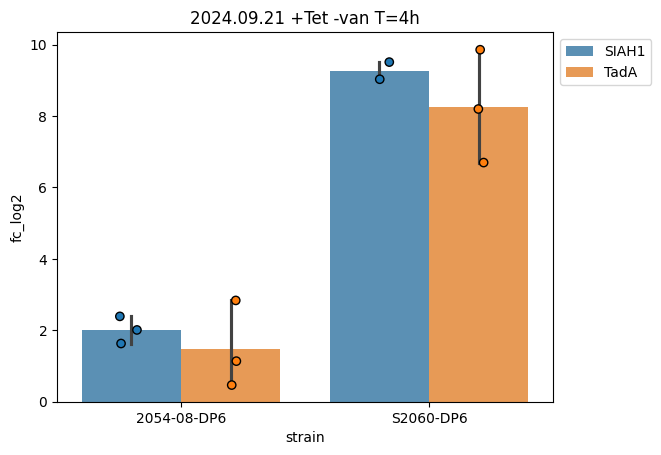

In [30]:
ax = bars(d_240[(d_240.Tetracyclin == 'induced') & (d_240.tp_min == 240)], x='strain', y='fc_log2', hue='Phage')
ax.set_title('2024.09.21 +Tet -van T=4h')

<ipython-input-31-04a728128612>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ax = bars(d_240[(d_240.Tetracyclin == 'uninduced') & (d_240.van_acid_um == 0) & (d_240.tp_min == 240) & df.strain.isin({'S2060-DP6', '2054-08-DP6'}) & (df.Phage != 'no phage')], x='strain', y='fc_log2', hue='Phage')


Text(0.5, 1.0, '2024.09.21 -Tet -van T=4h')

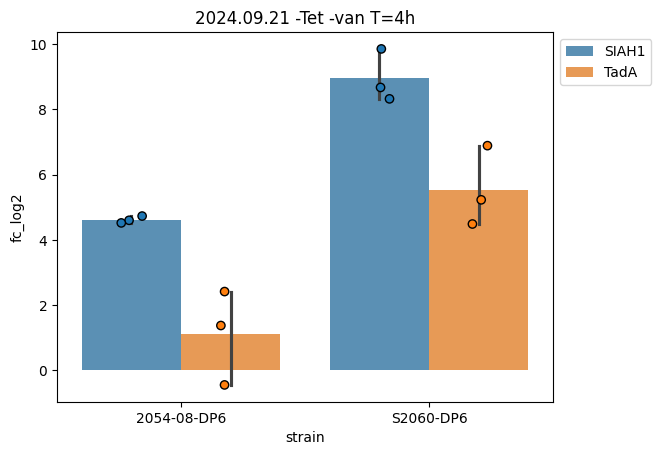

In [31]:
# how can we have propagation on -Tet on S2060? -? ct values seems to match, no problem with de-multiplexing.
ax = bars(d_240[(d_240.Tetracyclin == 'uninduced') & (d_240.van_acid_um == 0) & (d_240.tp_min == 240) & df.strain.isin({'S2060-DP6', '2054-08-DP6'}) & (df.Phage != 'no phage')], x='strain', y='fc_log2', hue='Phage')
ax.set_title('2024.09.21 -Tet -van T=4h')

Text(0.5, 1.0, '2024.09.21 -Tet T=240min')

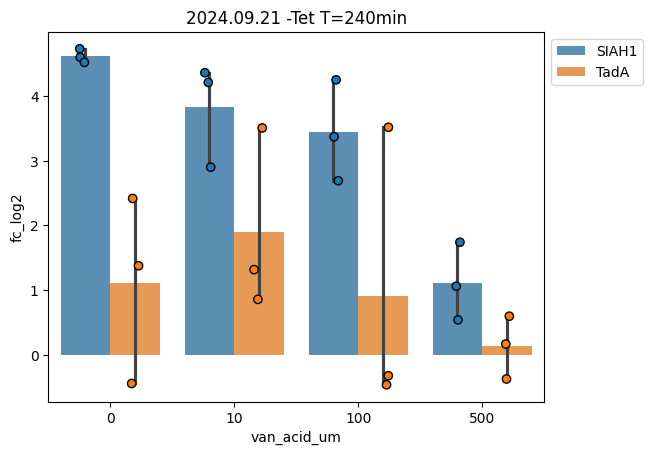

In [25]:
ax = bars(d_240[(d_240.Tetracyclin == 'uninduced') & (d_240.tp_min == 240) & (d_240.strain == '2054-08-DP6')], x='van_acid_um', y='fc_log2', hue='Phage')
ax.set_title('2024.09.21 -Tet T=240min')

Text(0.5, 1.0, '-Tet T=240min SIAH1')

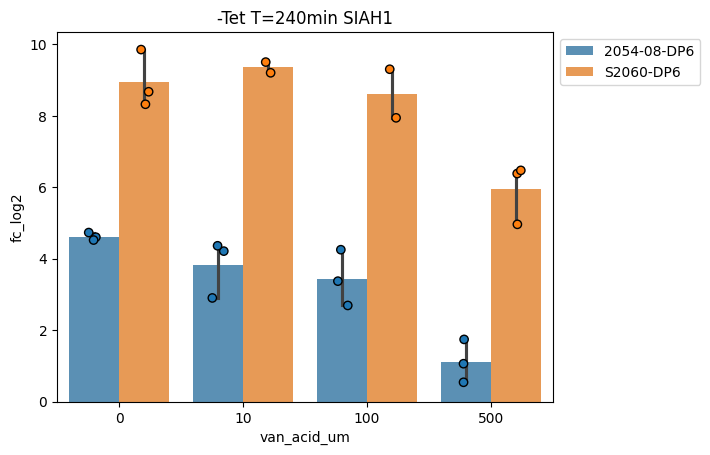

In [26]:
ax = bars(d_240[(d_240.Tetracyclin == 'uninduced') & (d_240.tp_min == 240) & (d_240.Phage == 'SIAH1') & (d_240.strain.isin({'2054-08-DP6', 'S2060-DP6'}))], x='van_acid_um', y='fc_log2', hue='strain')
ax.set_title('-Tet T=240min SIAH1')

Text(0.5, 1.0, '2024.09.21 -Tet -van T=4h')

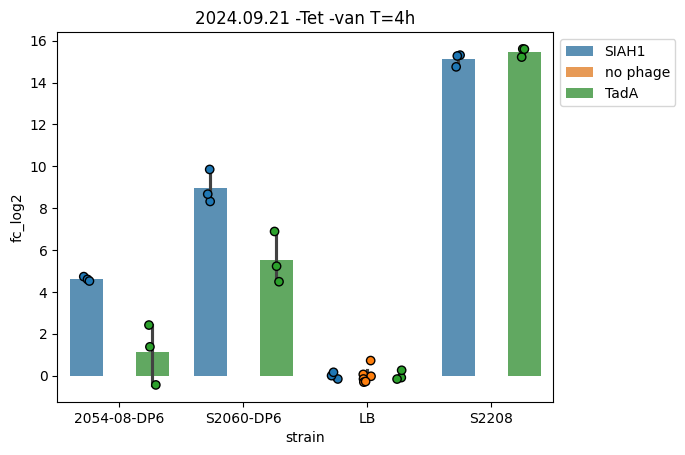

In [ ]:
d_480 = df[(df.tp_min == 480)]
d_480['cp_init'] = pd.NA
for phage in d_480.Phage.unique():
  d_480.loc[d_480.Phage == phage, 'cp_init'] = d_480[(d_480.Phage == phage) & (d_480.strain == 'LB')].cp.mean()

d_480['fc_log2'] = d_480.cp_init - d_480.cp
d_480['fc'] = 2 ** d_480.fc_log2
d_480

ax = bars(d_480[(d_480.Tetracyclin == 'uninduced') & (d_480.tp_min == 480) & (d_480.strain == '2054-08-DP6')], x='van_acid_um', y='fc', hue='Phage')
ax.set_title('-Tet T=ON')